# Hackaton IT-volontaire 25.07.2022 - 02.08.2022
## Задача 2. Бухгалтерская отчетность
### Ментор — Михаил Белоус

Из Росстата получены данные бухгалтерской отчетности всех действующих на май 2022 года фондов в России:

- Благотворительные фонды (ОКОПФ 070401)
- Общественные фонды (ОКОПФ 070403)
- Экологические фонды (ОКОПФ 070404)

Данные представлены за 2017-2021 годы. Считаем, что если в данных нет сведений по отчетности за какой-то год, это означает, что организация не предоставила отчетность за этот год.

- Очистить и описать данные
- Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников
- Определить факторы, влияющие на закредитованность, финансовое благополучие организации
- Любые дополнительные выводы и проверки

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [307]:
df = pd.read_excel('moscow.xlsx', sheet_name=1, header=3)
df.head()

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,1,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,7.728340e+09,Москва,45293598000,"Москва, Юго-Западный, Ясенево",4.591000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,7.714327e+09,Москва,45277598000,"Москва, Северный, Хорошевский",4.534800e+10,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,3,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,9.718006e+09,Москва,45263552000,"Москва, Восточный, Богородское",4.530100e+10,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0
3,4,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,9.703000e+09,Москва,45286575000,"Москва, Центральный, Пресненский",4.538000e+10,...,NaN,NaN,213000.0,96000.0,35000.0,NaN,NaN,39000.0,43000.0,8000.0
4,5,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,9.721146e+09,Москва,45290578000,"Москва, Юго-Восточный, Нижегородский",4.539200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Удаляем ненужные признаки

In [308]:
df.drop(['№', 'Регион регистрации', 'Код ОКАТО', 'Код ОКТМО', 'Код ОКОПФ', 'Код налогоплательщика'], axis=1, inplace=True)

In [309]:
df.shape

(3647, 156)

In [310]:
display(df.isnull().mean() * 100)

Наименование                                           0.000000
Регистрационный номер                                  0.054840
Дата регистрации                                       0.000000
Статус                                                 0.000000
Наименование ОКАТО                                     0.000000
                                                        ...    
2017, Остаток средств на конец отчетного года, RUB    80.285166
2018, Остаток средств на конец отчетного года, RUB    75.431862
2019, Остаток средств на конец отчетного года, RUB    71.894708
2020, Остаток средств на конец отчетного года, RUB    70.578558
2021, Остаток средств на конец отчетного года, RUB    71.044694
Length: 156, dtype: float64

In [311]:
df.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Наименование ОКАТО,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,"Москва, Юго-Западный, Ясенево",Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,"Москва, Северный, Хорошевский",Благотворительные фонды,NaN,NaN,NaN,NaN,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,"Москва, Восточный, Богородское",Благотворительные фонды,0 - 5,NaN,NaN,NaN,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0


### Выделим из признака "Наименование ОКАТО" отдельно район Москвы и его расположение

In [312]:
def get_parse_direction(location):
    location = location.split(', ')[1:]
    if len(location):
        return location[0]
    else:
        return ''

def get_parse_location_name(location):
    location = location.split(', ')[1:]
    if len(location) == 2:
        return location[1]
    else:
        return ''
    

In [313]:
df['direction'] = df['Наименование ОКАТО'].apply(get_parse_direction)
df['location_name'] = df['Наименование ОКАТО'].apply(get_parse_location_name)

df.drop(['Наименование ОКАТО'], axis=1, inplace=True)

In [351]:
df[['direction', 'location_name']].head()

,direction,location_name
0,Юго-Западный,Ясенево
1,Северный,Хорошевский
2,Восточный,Богородское
3,Центральный,Пресненский
4,Юго-Восточный,Нижегородский


### Заполним пропуски пока нулями, в интересующих нас столбцах с метриками

#### Можно поиграться и позаполнять пропуски чем-то еще

In [314]:
#создаем копию исходной таблицы
fill_df = df.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    '2017, Чистая прибыль (убыток), RUB': 0,
    '2018, Чистая прибыль (убыток), RUB': 0,
    '2019, Чистая прибыль (убыток), RUB': 0,
    '2020, Чистая прибыль (убыток), RUB': 0,
    '2021, Чистая прибыль (убыток), RUB': 0,
    '2017, Среднесписочная численность работников': 0,
    '2018, Среднесписочная численность работников': 0,
    '2019, Среднесписочная численность работников': 0,
    '2020, Среднесписочная численность работников': 0,
    '2021, Среднесписочная численность работников': 0
    
}
#заполняем пропуски в соответствии с заявленным словарем
fill_df = fill_df.fillna(values)
#выводим результирующую долю пропусков
fill_df.isnull().mean()

Наименование                                          0.000000
Регистрационный номер                                 0.000548
Дата регистрации                                      0.000000
Статус                                                0.000000
Организационно-правовая форма                         0.000000
                                                        ...   
2019, Остаток средств на конец отчетного года, RUB    0.718947
2020, Остаток средств на конец отчетного года, RUB    0.705786
2021, Остаток средств на конец отчетного года, RUB    0.710447
direction                                             0.000000
location_name                                         0.000000
Length: 157, dtype: float64

### Преобразуем признак с численностью сотрудников в удобный вид

In [315]:
def get_employees(persons):
    if persons == 0:
        return 0
    if persons == '0 - 5':
        return 5
    elif persons == '6 - 10':
        return 10
    elif persons == '16 - 50':
        return 50
    elif persons == '51 - 100':
        return 100
    elif persons == '101 - 150':
        return 150
    elif persons == '151 - 200':
        return 200
    elif persons == '201 - 250':
        return 250
    elif persons == '201 - 250':
        return 250
    elif persons == '251 - 500':
        return 500
    elif persons == '501 - 1000':
        return 1000
    

In [316]:
fill_df['2017 employees'] = fill_df['2017, Среднесписочная численность работников'].apply(get_employees)
fill_df['2018 employees'] = fill_df['2018, Среднесписочная численность работников'].apply(get_employees)
fill_df['2019 employees'] = fill_df['2019, Среднесписочная численность работников'].apply(get_employees)
fill_df['2020 employees'] = fill_df['2020, Среднесписочная численность работников']#.apply(get_employees)
fill_df['2021 employees'] = fill_df['2021, Среднесписочная численность работников']#.apply(get_employees)

fill_df['2017 income'] = fill_df['2017, Чистая прибыль (убыток), RUB']/1e6
fill_df['2018 income'] = fill_df['2017, Чистая прибыль (убыток), RUB']/1e6
fill_df['2019 income'] = fill_df['2017, Чистая прибыль (убыток), RUB']/1e6
fill_df['2020 income'] = fill_df['2017, Чистая прибыль (убыток), RUB']/1e6
fill_df['2021 income'] = fill_df['2017, Чистая прибыль (убыток), RUB']/1e6

fill_df.drop([
    '2017, Чистая прибыль (убыток), RUB',
    '2018, Чистая прибыль (убыток), RUB',
    '2019, Чистая прибыль (убыток), RUB',
    '2020, Чистая прибыль (убыток), RUB',
    '2021, Чистая прибыль (убыток), RUB',
    '2017, Среднесписочная численность работников',
    '2018, Среднесписочная численность работников',
    '2019, Среднесписочная численность работников',
    '2020, Среднесписочная численность работников',
    '2021, Среднесписочная численность работников'], axis=1, inplace=True)

In [318]:
fill_df.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Организационно-правовая форма,"2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB",...,2017 employees,2018 employees,2019 employees,2020 employees,2021 employees,2017 income,2018 income,2019 income,2020 income,2021 income
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Выделяем столбцы, содержащие наши метрики

In [319]:
df_set = fill_df[
    ['2017 income',
    '2018 income',
    '2019 income',
    '2020 income',
    '2021 income',
    '2017 employees',
    '2018 employees',
    '2019 employees',
    '2020 employees',
    '2021 employees']]

In [361]:
df_set.head()

,2017 income,2018 income,2019 income,2020 income,2021 income,2017 employees,2018 employees,2019 employees,2020 employees,2021 employees
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [362]:
df_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2017 income     3647 non-null   float64
 1   2018 income     3647 non-null   float64
 2   2019 income     3647 non-null   float64
 3   2020 income     3647 non-null   float64
 4   2021 income     3647 non-null   float64
 5   2017 employees  3592 non-null   float64
 6   2018 employees  3646 non-null   float64
 7   2019 employees  3647 non-null   int64  
 8   2020 employees  3647 non-null   float64
 9   2021 employees  3647 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 285.0 KB


<AxesSubplot:>

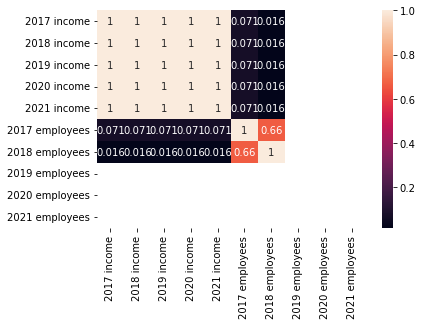

In [363]:
sns.heatmap(df_set.corr(), annot = True)

## 2017 год

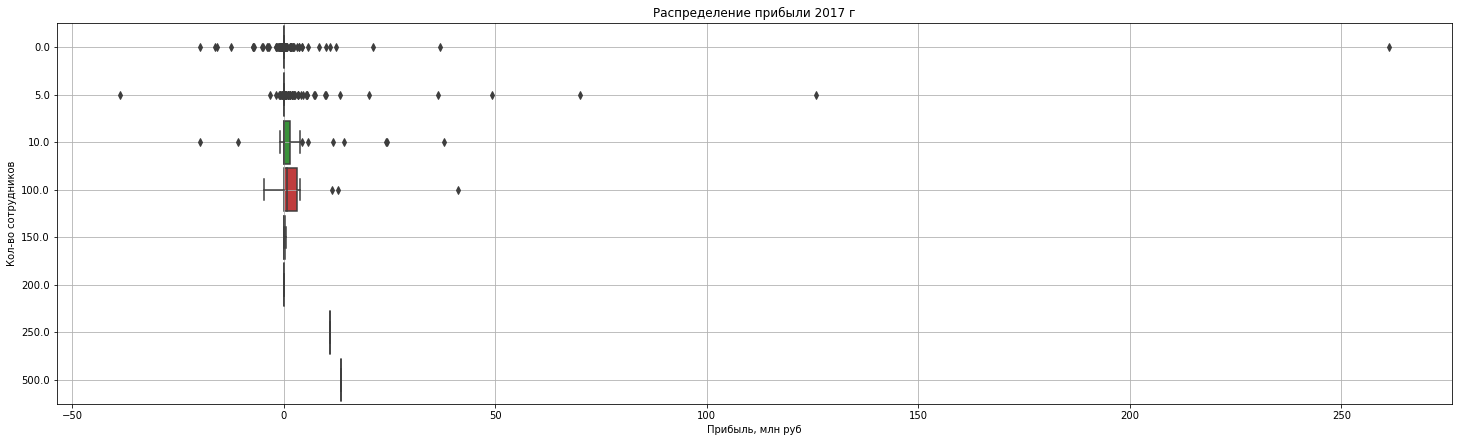

In [349]:
fig = plt.figure(figsize=(25, 7))
boxplot = sns.boxplot(
    data=df_set,
    x='2017 income',
    y='2017 employees',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение прибыли 2017 г');
boxplot.set_xlabel('Прибыль, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()


## 2018 год

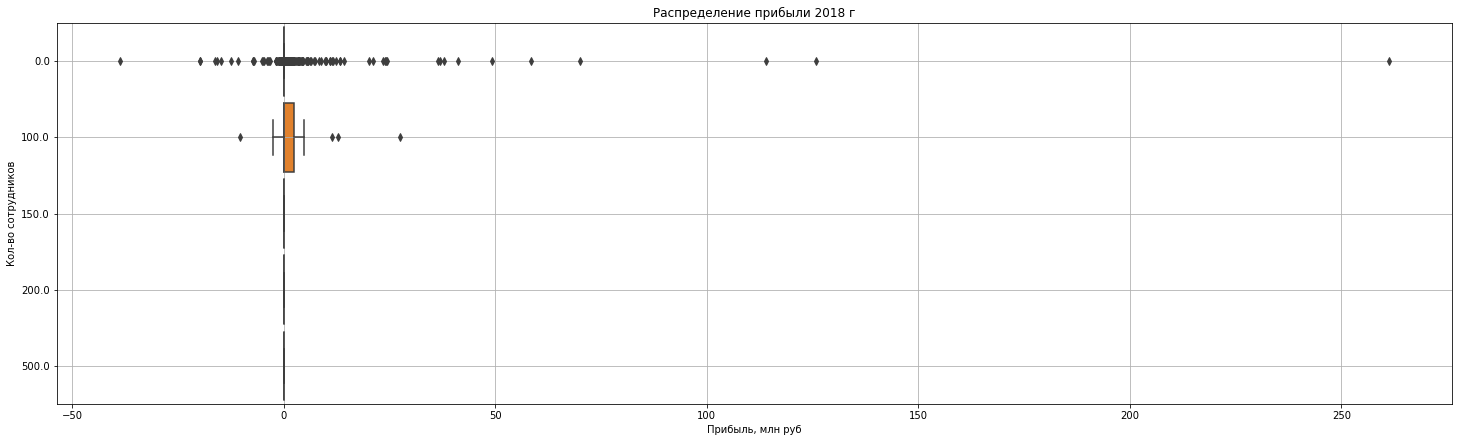

In [325]:
fig = plt.figure(figsize=(25, 7))
boxplot = sns.boxplot(
    data=df_set,
    x="2018 income",
    y="2018 employees",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение прибыли 2018 г');
boxplot.set_xlabel('Прибыль, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()

## 2019 год

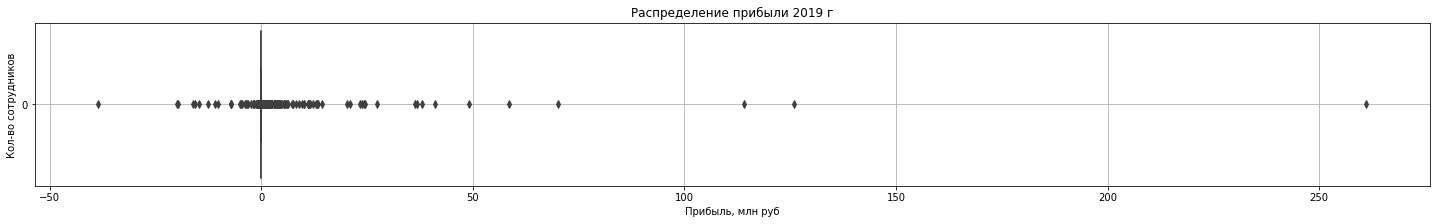

In [326]:
fig = plt.figure(figsize=(25, 3))
boxplot = sns.boxplot(
    data=df_set,
    x="2019 income",
    y="2019 employees",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение прибыли 2019 г');
boxplot.set_xlabel('Прибыль, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()

## 2020 год

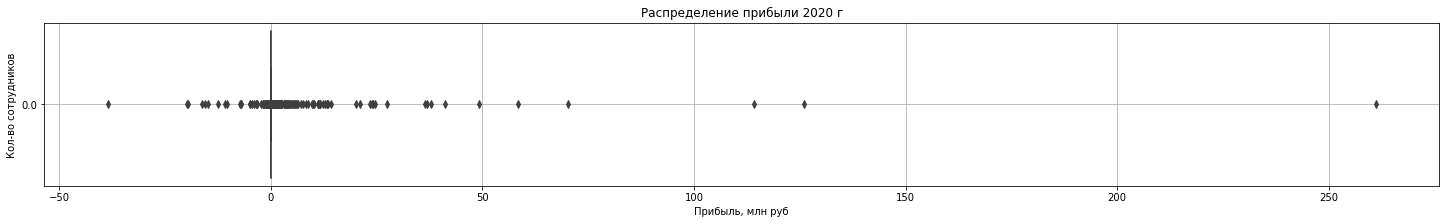

In [331]:
fig = plt.figure(figsize=(25, 3))
boxplot = sns.boxplot(
    data=df_set,
    x="2020 income",
    y="2020 employees",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение прибыли 2020 г');
boxplot.set_xlabel('Прибыль, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()

## 2021 год

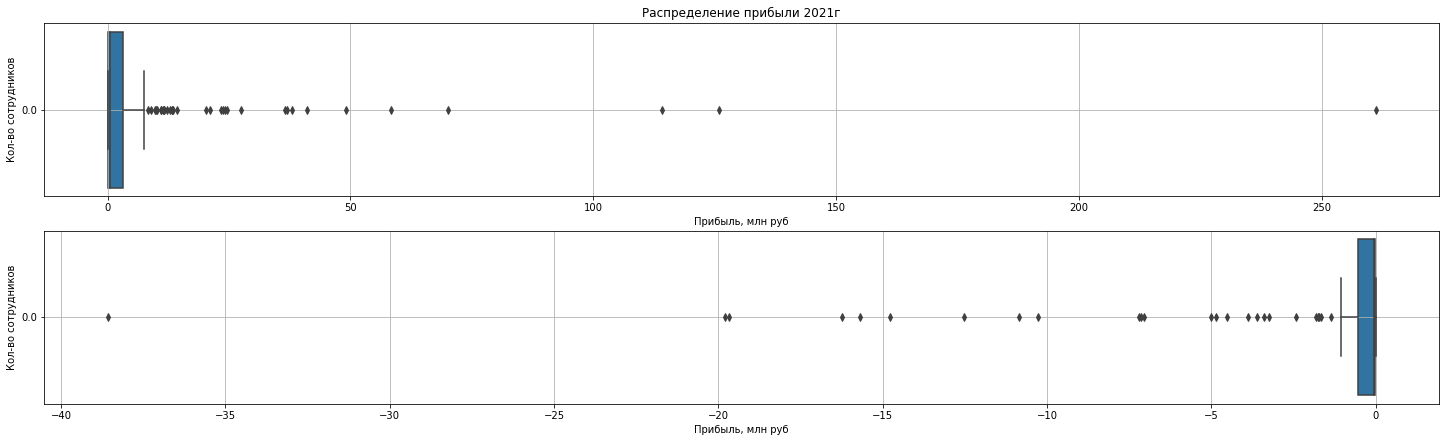

<Figure size 1800x216 with 0 Axes>

In [346]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 7))
mask_pos = (df_set['2021 income'] > 0) #df_set['2021 income'] < 20) & 
mask_neg = (df_set['2021 income'] < 0) #& (df_set['2021 income'] > - 20)
fig = plt.figure(figsize=(25, 3))
boxplot1 = sns.boxplot(
    data=df_set[mask_pos],
    x="2021 income",
    y="2021 employees",
    orient='h',
    width=0.9,
    ax=axes[0]
)
boxplot1.set_title('Распределение прибыли 2021г');
boxplot1.set_xlabel('Прибыль, млн руб');
boxplot1.set_ylabel('Кол-во сотрудников');
boxplot1.grid()
boxplot2 = sns.boxplot(
    data=df_set[mask_neg],
    x="2021 income",
    y="2021 employees",
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot2.set_xlabel('Прибыль, млн руб');
boxplot2.set_ylabel('Кол-во сотрудников');
boxplot2.grid()